In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, auc, roc_auc_score)
from sklearn.linear_model import LogisticRegression



# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)



In [7]:
print("=" * 80)
print("DISEASE PREDICTION SYSTEM - MULTI-DISEASE CLASSIFICATION")
print("=" * 80)
# STEP 1: DATA LOADING AND INITIAL EXPLORATIO

print("\n" + "=" * 80)
print("STEP 1: LOADING DATASETS")
print("=" * 80)

# Load datasets
df = pd.read_csv('heart.csv')
df.info()
df.head()


DISEASE PREDICTION SYSTEM - MULTI-DISEASE CLASSIFICATION

STEP 1: LOADING DATASETS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
## checking for null values
df.isnull().sum().sum()
df.isnull().sum()





,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [24]:

## DATA CLEANING AND PREPROCESSING


print("\n" + "=" * 80)
print("STEP 2: DATA CLEANING AND PREPROCESSING")
print("=" * 80)

def clean_dataset(df, target_col, dataset_name):
    """Clean and preprocess dataset"""
    print(f"\nCleaning {dataset_name} dataset...")

    # Make a copy
    df_clean = df.copy()

    # Handle missing values
    missing = df_clean.isnull().sum()
    if missing.sum() > 0:
        print(f"  Missing values found: {missing[missing > 0].to_dict()}")
        # Fill numerical with median, categorical with mode
        for col in df_clean.columns:
            if df_clean[col].isnull().any():
                if df_clean[col].dtype in ['float64', 'int64']:
                    df_clean[col].fillna(df_clean[col].median(), inplace=True)
                else:
                    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
    else:
        print("  No missing values found")

    # Remove duplicates
    duplicates = df_clean.duplicated().sum()
    if duplicates > 0:
        print(f"  Removing {duplicates} duplicate rows")
        df_clean = df_clean.drop_duplicates()

    # Handle outliers using IQR method (optional, can be commented out)
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    numerical_cols = [col for col in numerical_cols if col != target_col]

    print(f"  Dataset shape after cleaning: {df_clean.shape}")

    return df_clean

# Clean all datasets
# Note: Adjust target column names based on your actual data
heart_clean = clean_dataset(df, 'target', 'Heart Disease')


STEP 2: DATA CLEANING AND PREPROCESSING

Cleaning Heart Disease dataset...
  No missing values found
  Removing 723 duplicate rows
  Dataset shape after cleaning: (302, 14)


EXPLORATORY DATA ANALYSIS (EDA)


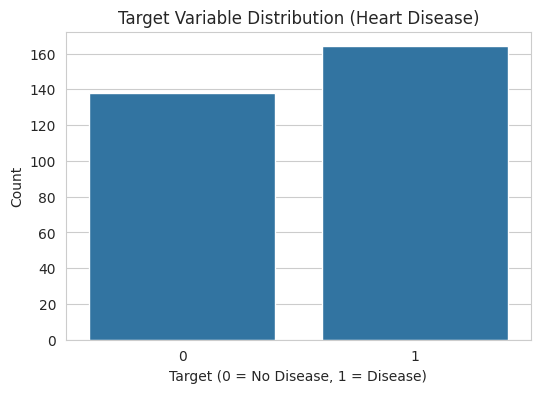

In [26]:
## EDA
print("EXPLORATORY DATA ANALYSIS (EDA)")


plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=heart_clean)
plt.title("Target Variable Distribution (Heart Disease)")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()


STEP 3: EXPLORATORY DATA ANALYSIS


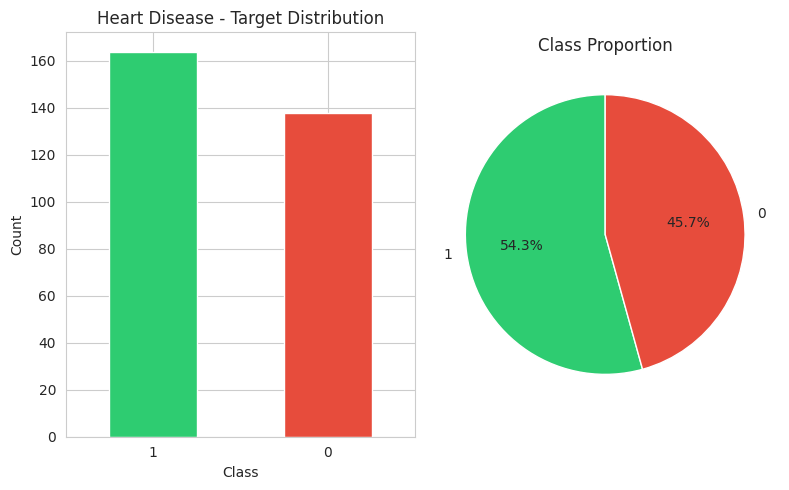


Heart Disease Class Distribution:
target
1    164
0    138
Name: count, dtype: int64
Class Balance: 84.15%


In [29]:

## EXPLORATORY DATA ANALYSIS

print("STEP 3: EXPLORATORY DATA ANALYSIS")


def plot_target_distribution(df, target_col, dataset_name):
    """Plot target variable distribution"""
    plt.figure(figsize=(8, 5))

    counts = df[target_col].value_counts()
    plt.subplot(1, 2, 1)
    counts.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
    plt.title(f'{dataset_name} - Target Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    plt.subplot(1, 2, 2)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90)
    plt.title('Class Proportion')

    plt.tight_layout()
    plt.show()

    print(f"\n{dataset_name} Class Distribution:")
    print(counts)
    print(f"Class Balance: {(counts.min() / counts.max() * 100):.2f}%")

# Plot distributions
plot_target_distribution(heart_clean, 'target', 'Heart Disease')

# # Correlation heatmap for Heart Disease (example)
# plt.figure(figsize=(14, 10))
# correlation = heart_clean.corr()
# sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0)
# plt.title('Heart Disease - Feature Correlation Heatmap')
# plt.tight_layout()
# plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = heart_clean.drop(columns=["target"])
y = heart_clean["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Feature scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

Model Accuracy: 0.8033


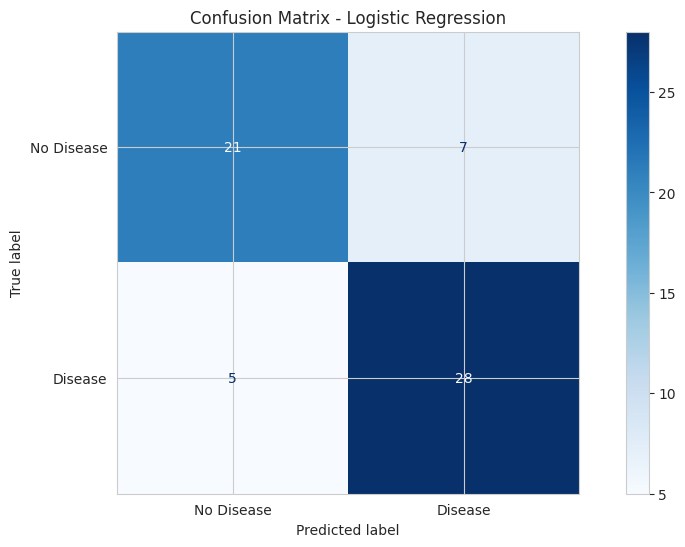

In [33]:
from sklearn.metrics import accuracy_score

y_pred = log_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["No Disease", "Disease"]
)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


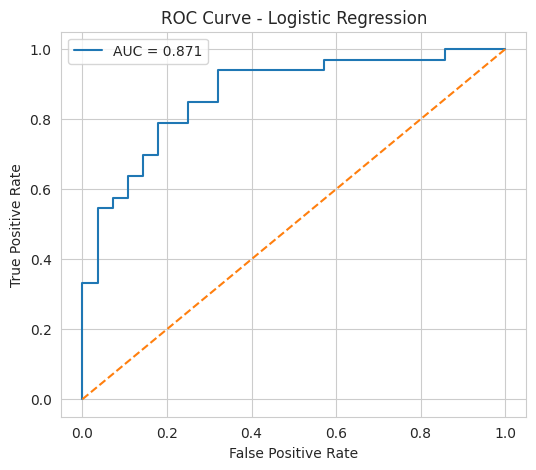

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = log_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


     Feature  Coefficient
2         cp     0.978893
1        sex    -0.876002
7    thalach     0.818189
11        ca    -0.740095
12      thal    -0.521572
8      exang    -0.499109
9    oldpeak    -0.400050
3   trestbps    -0.358746
10     slope     0.309090
4       chol    -0.279967
6    restecg     0.224004
5        fbs    -0.112431
0        age     0.087868


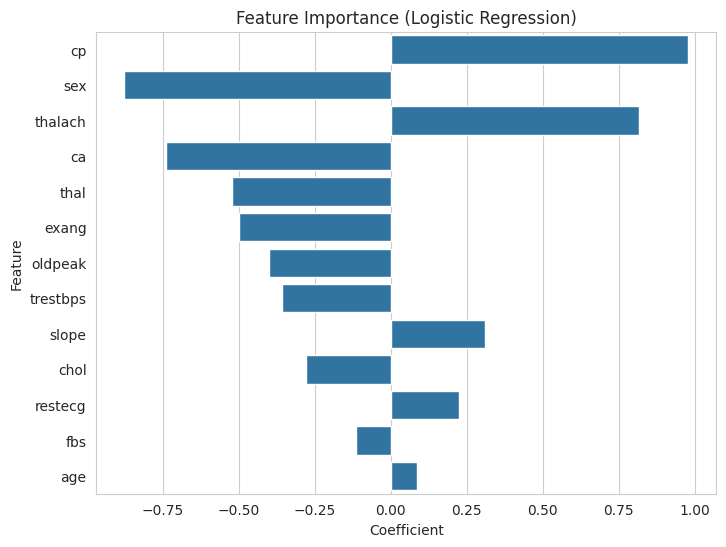

In [35]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(feature_importance)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=feature_importance,
    x="Coefficient",
    y="Feature"
)
plt.title("Feature Importance (Logistic Regression)")
plt.show()
